In [1]:
# import itertools as it
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools as it
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [2]:
pd.set_option('display.max_columns', None)

# 0 Исходные данные

Исходные данные состоят из двух таблиц: Transaction и Identity. Загрузим таблицы и выполним join по колонке TransactionID

In [3]:
path_common_source_trans = 'train_transaction.csv'
path_common_source_idn = 'train_identity.csv'
path_to_data_folder = './'

In [4]:
data_raw = pd.merge(pd.read_csv(path_common_source_trans), pd.read_csv(path_common_source_idn),
                    left_on='TransactionID', right_on='TransactionID', how='left')

# 1 Особенности данных

## 1.1 Основные статистики

### Вещественные признаки

In [5]:
num_describe = data_raw.describe()

Для некоторых категориальных признаков данные в таблице храняться в формате numpy.int64 или numpy.float64. Поэтому при вызове метода `describe()` для этих колонок рассчитываются числовые статистики. Удалим лишние колонки из `num_describe`

In [6]:
# из describe удаляем категориальные колонки
obj_cols = ['isFraud', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
            'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']
num_describe = num_describe.drop(columns=obj_cols)
num_describe

,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
count,5.905400e+05,5.905400e+05,590540.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,5

### Категориальные признаки

In [7]:
obj_describe = data_raw.describe(include='object')

In [8]:
obj_describe

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


Колонки, в которых данные хранятся в формате numpy.int64 или numpy.float64, не попали в `obj_describe`. Добавим их.

In [9]:
def add_categorical_int_inplace(df, df_describe, name):
    '''
    Рассчитывает count, unique, top, freq для категориальной колонки, в которой хранятся числовые значения.
    Добавляет рассчитанные характеристики в df_describe.
    Параметры:
    df - датафрейм
    df_describe - датафрейм, содержащий статистики count, unique, top, freq для колонок датафрейма df
    name - имя колонки, для которой необходимо посчитать count, unique, top, freq
    '''
    counts = df.groupby(name)[name].count()
    top_elem = counts.idxmax()
    top_elem_freq = counts[top_elem]
    s = df[name]
    df_describe.loc[:, name] = [s.count(), len(counts), top_elem, top_elem_freq]

In [10]:
for name in obj_cols:
    add_categorical_int_inplace(data_raw, obj_describe, name)

In [11]:
obj_describe

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,card1,card2,card3,card5,addr1,addr2,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666,590540,590540,581607.0,588975.0,586281.0,524834.0,524834.0,127320.0,80044.0,139369.0,45113.0,139318.0,139261.0,5159.0,5169.0,4747.0,5132.0,5163.0,77586.0
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786,2,13553,500.0,114.0,119.0,332.0,74.0,54.0,25.0,104.0,18.0,522.0,394.0,490.0,25.0,12.0,341.0,95.0,4.0
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows,0,7919,321.0,150.0,226.0,299.0,87.0,52.0,-300.0,166.0,15.0,266.0,507.0,252.0,14.0,11.0,321.0,161.0,24.0
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722,569877,14932,48935.0,521287.0,296546.0,46335.0,520481.0,58099.0,44121.0,78631.0,25489.0,19849.0,22311.0,2542.0,4736.0,2817.0,2494.0,824.0,53071.0


## 1.2 Пропущенные значения

Доля пропущенных значений в таблице

In [12]:
print(data_raw.isna().sum().sum() / (data_raw.shape[0]*data_raw.shape[1]))

0.45074371905803934


Рассчитаем долю пропущенных значений по каждой колонке

In [13]:
def get_share_of_NaN(df):
    '''
    Рассчитывает количество пропусков в каждой колонке, а также долю пропусков в каждой колонке
    Параметры:
    df - датафрейм
    Возвращает датафрейм, содержащий информацию о пропусках в каждой колонке датафрейма df
    '''
    result = pd.DataFrame(columns=['Name', 'Number_of_NaN', 'Share_of_NaN'])
    colcount = df.count()
    length = len(df)
    for col_name in colcount.keys():
        result.loc[len(result)] = [col_name, length-colcount[col_name], (length-colcount[col_name])/length]
    return result

In [14]:
number_of_nan = get_share_of_NaN(data_raw)

In [15]:
pd.set_option('display.max_rows', None)
number_of_nan

,Name,Number_of_NaN,Share_of_NaN
0,TransactionID,0,0.000000
1,isFraud,0,0.000000
2,TransactionDT,0,0.000000
3,TransactionAmt,0,0.000000
4,ProductCD,0,0.000000
5,card1,0,0.000000
6,card2,8933,0.015127
7,card3,1565,0.002650
8,card4,1577,0.002670
9,card5,4259,0.007212


In [16]:
pd.reset_option('display.max_rows')

## 1.3 - 1.4 Ошибочные данные и выбросы

Наш датасет представляет собой очень разреженную таблицу. Более того, физический смысл известен для очень ограниченного числа признаков  - в частности, для 10 мы точно знаем что они означают и еще о 20 признаках мы имеем примерное понимание назначения. В связи с этим сложно говорить об ошибочных данных. 

Выбросами считаем строки в которых у столбца isFraud значение 1. Обрабатывать их на данном этапе не будем, это задача нашего годового проекта и собственного машинного обучения.

# 2 Анализ признаков

## 2.1 Обработка данных, отбор признаков

Исходные необработанные данные содержат 433 признака. Проведем отбор признаков, кторые оказывают наибольшее воздействие на целевую переменную, и изучим поведение этих признаков. 

### 2.1.1 Колонки с большим количеством пропусков

Удалим колонки, в которых доля пропусков больше 85%

In [17]:
def remove_columns_with_many_NaN(df, max_nan_rate):
    '''
    Функция удаляет из датафрейма df колонки, в которых доля пропусков больше, чем max_nan_rate
    Параметры:
    df - DataFrame
    max_nan_rate - максимальная допустимая доля NaN в колонках датафрейма
    Функция возвращает:
    1) новый датафрейм, в котором удалены колонки, в которых доля NaN больше, чем max_nan_rate
    2) список удалённых колонок
    '''
    df_copy = df.copy()
    removed_columns = []
    nan_stat = get_share_of_NaN(df)
    for i in range(len(nan_stat)):
        column = nan_stat.loc[i]
        if(column['Share_of_NaN'] > max_nan_rate):
            removed_columns.append(column['Name'])
            
    df_copy.drop(columns=removed_columns, inplace=True)
    return df_copy, removed_columns

In [18]:
data, _ = remove_columns_with_many_NaN(data_raw, 0.85)

### 2.1.2 Колонки с большой корреляцией

Удалим колонки, у которых корреляция больше 0.9

In [19]:
def remove_columns_with_big_correlation(df, max_corr):
    '''
    Параметры:
    df - DataFrame
    max_corr - максимальная допустимая корреляция между колонками
    Функция возвращает:
    1) новый датафрейм, в котором удалены колонки, в которых корреляция больше, чем max_corr
    2) set удалённых колонок
    '''
    df_copy = df.copy()
    removed_columns = set()
    corrs = df.corr()
    cols = corrs.columns
    for i in range(len(cols)):
        col_name_1 = cols[i]
        if col_name_1 in {'TransactionID', 'isFraud', 'TransactionDT'} or col_name_1 in removed_columns:
            continue
        
        for j in range(i+1, len(cols)):
            col_name_2 = cols[j]
            if abs(corrs[col_name_1][col_name_2]) > max_corr:
                removed_columns.add(col_name_2)

    df_copy.drop(columns=removed_columns, inplace=True)
    return df_copy, removed_columns

In [20]:
data, _ = remove_columns_with_big_correlation(data, 0.9)

### 2.1.3 Feature Importance

Выполним оценку важности признаков. 
Для этого обучим модель логистической регрессии и оценим значения весов. После чего по величине весов выполним отбор наиболее значимых признаков.

#### 2.1.3.1 Заполнение пропусков в таблице

In [21]:
# датафрейм для логистической регрессии
data_lr = data.copy()

In [22]:
# маска для категориальных признаков
cat_features_mask = (data_lr.dtypes == "object").values
# маска для числовых признаков
val_features_mask = (data_lr.dtypes != "object").values
# удалим из val_features_mask и добавим в cat_features_mask категориальные колонки, содержащие числовые данные int или float
for i in range(len(data_lr.columns)):
    if data_lr.iloc[:,i].name in obj_cols:
        cat_features_mask[i] = True
        val_features_mask[i] = False


In [23]:
def proc_cat_col(df, cat_features_mask):
    '''
    Заполняет пропуски в категориальных колонках датафрейма df
    Пропуски заполняются модой, рассчитанной для всей выборки из таблицы df
    Параметры:
    df - датафрейм
    cat_features_mask - маска категориальных колонок
    '''
    cat_cols = df.columns[cat_features_mask]
    for col in cat_cols:
        dc = df.loc[:,col]
        dc.fillna(dc.mode()[0], inplace=True)

def proc_val_col(df, cat_features_mask, sample_size):
    '''
    Заполняет пропуски в числовых колонках датафрейма df
    Пропуски заполняются модой, рассчитанной для случайной выборки размера sample_size из таблицы df
    Параметры:
    df - датафрейм
    cat_features_mask - маска категориальных колонок
    sample_size - размер выборки, для которой рассчитывается мода
    '''
    val_cols = df.columns[~cat_features_mask]
    for col in val_cols:
        dc = df.loc[:,col]
        dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)

Будем заполнять пропуски для числовых признаков модой по случайной выборке этого же признака размера 10_000. Чтобы это было легитимно, выборка должна состоять из объектов с таким же значением целевой переменной как и у обрабатываемого объекта. Для этого разделим выборку на две части: в одну поместим все объекты, у которых целевая переменная isFraud=0, в другую все объекты, у которых isFraud=1. Заполним пропуски в обеих частях, после чего объединим части датасета и выполним сортировку по TransactionID.

In [24]:
%%time
# Р
data_f0 = data_lr[data_lr['isFraud'] == 0]
data_f1 = data_lr[data_lr['isFraud'] == 1]
proc_cat_col(data_f0, cat_features_mask)
proc_val_col(data_f0, cat_features_mask, 10000)
proc_cat_col(data_f1, cat_features_mask)
proc_val_col(data_f1, cat_features_mask, 10000)
data_lr = pd.concat([data_f0, data_f1])

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inp

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inp

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.mode()[0], inp

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc.fillna(dc.sample(n=sample_size).dropna().mode()[0], inplace=True)
C:\Users\Art\AppData\Local\Temp\ipykernel_11212\2799657520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

CPU times: total: 19 s
Wall time: 19.2 s


In [25]:
data_lr.sort_values(by=['TransactionID'], inplace=True)

#### 2.1.3.2 Кодирование категориальных признаков

Используем mean encoding для признаков, у которых большое количество уникальных значений (больше 60ти).
Признаки, у которых количество уникальных значений 60 и меньше, используем one hot encoding.

In [26]:
def get_mean_encoding(df, columns, target):
    '''
    Кодирует колонки из таблицы df методом mean encoding
    Параметры:
    df - датафрейм
    columns - названия колонок, которые необходимо закодировать
    target - название целевой переменной
    Возвращает DataFrame с закодированными колонками
    '''
    df_copy = df.copy()
    for col in columns:
        mean_encoded = df.groupby(col)[target].mean()
        df_copy[col] = df_copy[col].map(mean_encoded)
    return df_copy

In [27]:
cat_mean_enc_cols = ['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
                     'id_13', 'id_17', 'id_19', 'id_20', 'id_31', 'DeviceInfo']
data_lr = get_mean_encoding(data_lr, cat_mean_enc_cols, 'isFraud')

Значения бинарных категориальных признаков закодируем через 0 и 1.

In [28]:
# map binary categorical columns values to 0 or 1
d_for_map = {'F': 0, 'T': 1, 'NotFound': 0, 'Found': 1, 'New': 0, 'desktop': 0, 'mobile': 1}
cat_map_cols = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
           'id_12', 'id_16', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']

for col in cat_map_cols:
    data_lr[col] = data_lr[col].map(d_for_map)


Категориальные признаки, у которых больше 2-х и меньше 61-го униакального значения, закодируем с помощью one hot encoding.

In [29]:
# code One Hot Encoding only cat_dum_cols
cat_dum_cols = ['card4', 'card6','ProductCD', 'P_emaildomain', 'R_emaildomain', 'M4', 'id_15']
data_lr = pd.get_dummies(data_lr, drop_first=True, columns=cat_dum_cols)

#### 2.1.3.3 Обучение модели

In [30]:
# Вектор значений целевой переменной
y = data_lr['isFraud']
# Матрица объект-признак
# Удалим колонку TransactionID, т.к. корреляция для TransactionID и TransactionDT близка к 1
X = data_lr.drop(columns=['isFraud', 'TransactionID'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [32]:
normalizer = preprocessing.MinMaxScaler()
X_train_norm = pd.DataFrame(data=normalizer.fit_transform(X_train))

In [33]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000)

In [34]:
X_test_norm = pd.DataFrame(data=normalizer.fit_transform(X_test))
pred_logreg = logreg.predict(X_test_norm)
r2_score(y_test, pred_logreg)

0.9997990701838871

#### 2.1.3.4 Анализ результатов, отбор признаков

In [35]:
median_val = np.median(abs(logreg.coef_[0]))
min_val = np.min(abs(logreg.coef_[0]))
max_val = np.max(abs(logreg.coef_[0]))
print()
print(f'Абсолютные величины весов находятся в диапазоне от {min_val:.3e} до {max_val:.4f}. Медиана = {median_val:.4f}')


Абсолютные величины весов находятся в диапазоне от 4.665e-08 до 14.5742. Медиана = 0.0857


#### Гистограмма весов

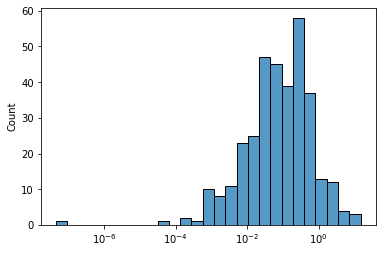

In [36]:
sns.histplot(abs(logreg.coef_[0]), log_scale=True);

Проведем отбор наиболее значимых признаков. Величина значимости признака определяется абсолютной величиной его веса. В качестве критерия отбора выберем значение 0.05. 

Удалим из таблицы признаки, веса которых меньше 0.05

У признаков P_emaildomain, R_emaildomain значения весов меньше 0.05. Несмотря на это было решено оставить эти признаки для анализа, т.к. это одни из немногих категориальных интерпретируемых признаков в датасете

In [37]:
# сохраним названия колонок, которые нужно удалить в список removed_cols
removed_cols = []
for i in range(len(logreg.coef_[0])):
    coef = logreg.coef_[0][i]
    if abs(coef) < 0.05 and 'emaildomain' not in X.columns[i]:
        removed_cols.append(X.columns[i])

In [38]:
removed_cols.remove('card6_debit or credit')

In [39]:
data = data.drop(columns=removed_cols)

In [40]:
data = data.drop(columns=['card6'])

## 2.2 Анализ отобранных признаков

In [3]:
data = pd.read_csv('fraud_for_graphs.csv')

<AxesSubplot:>

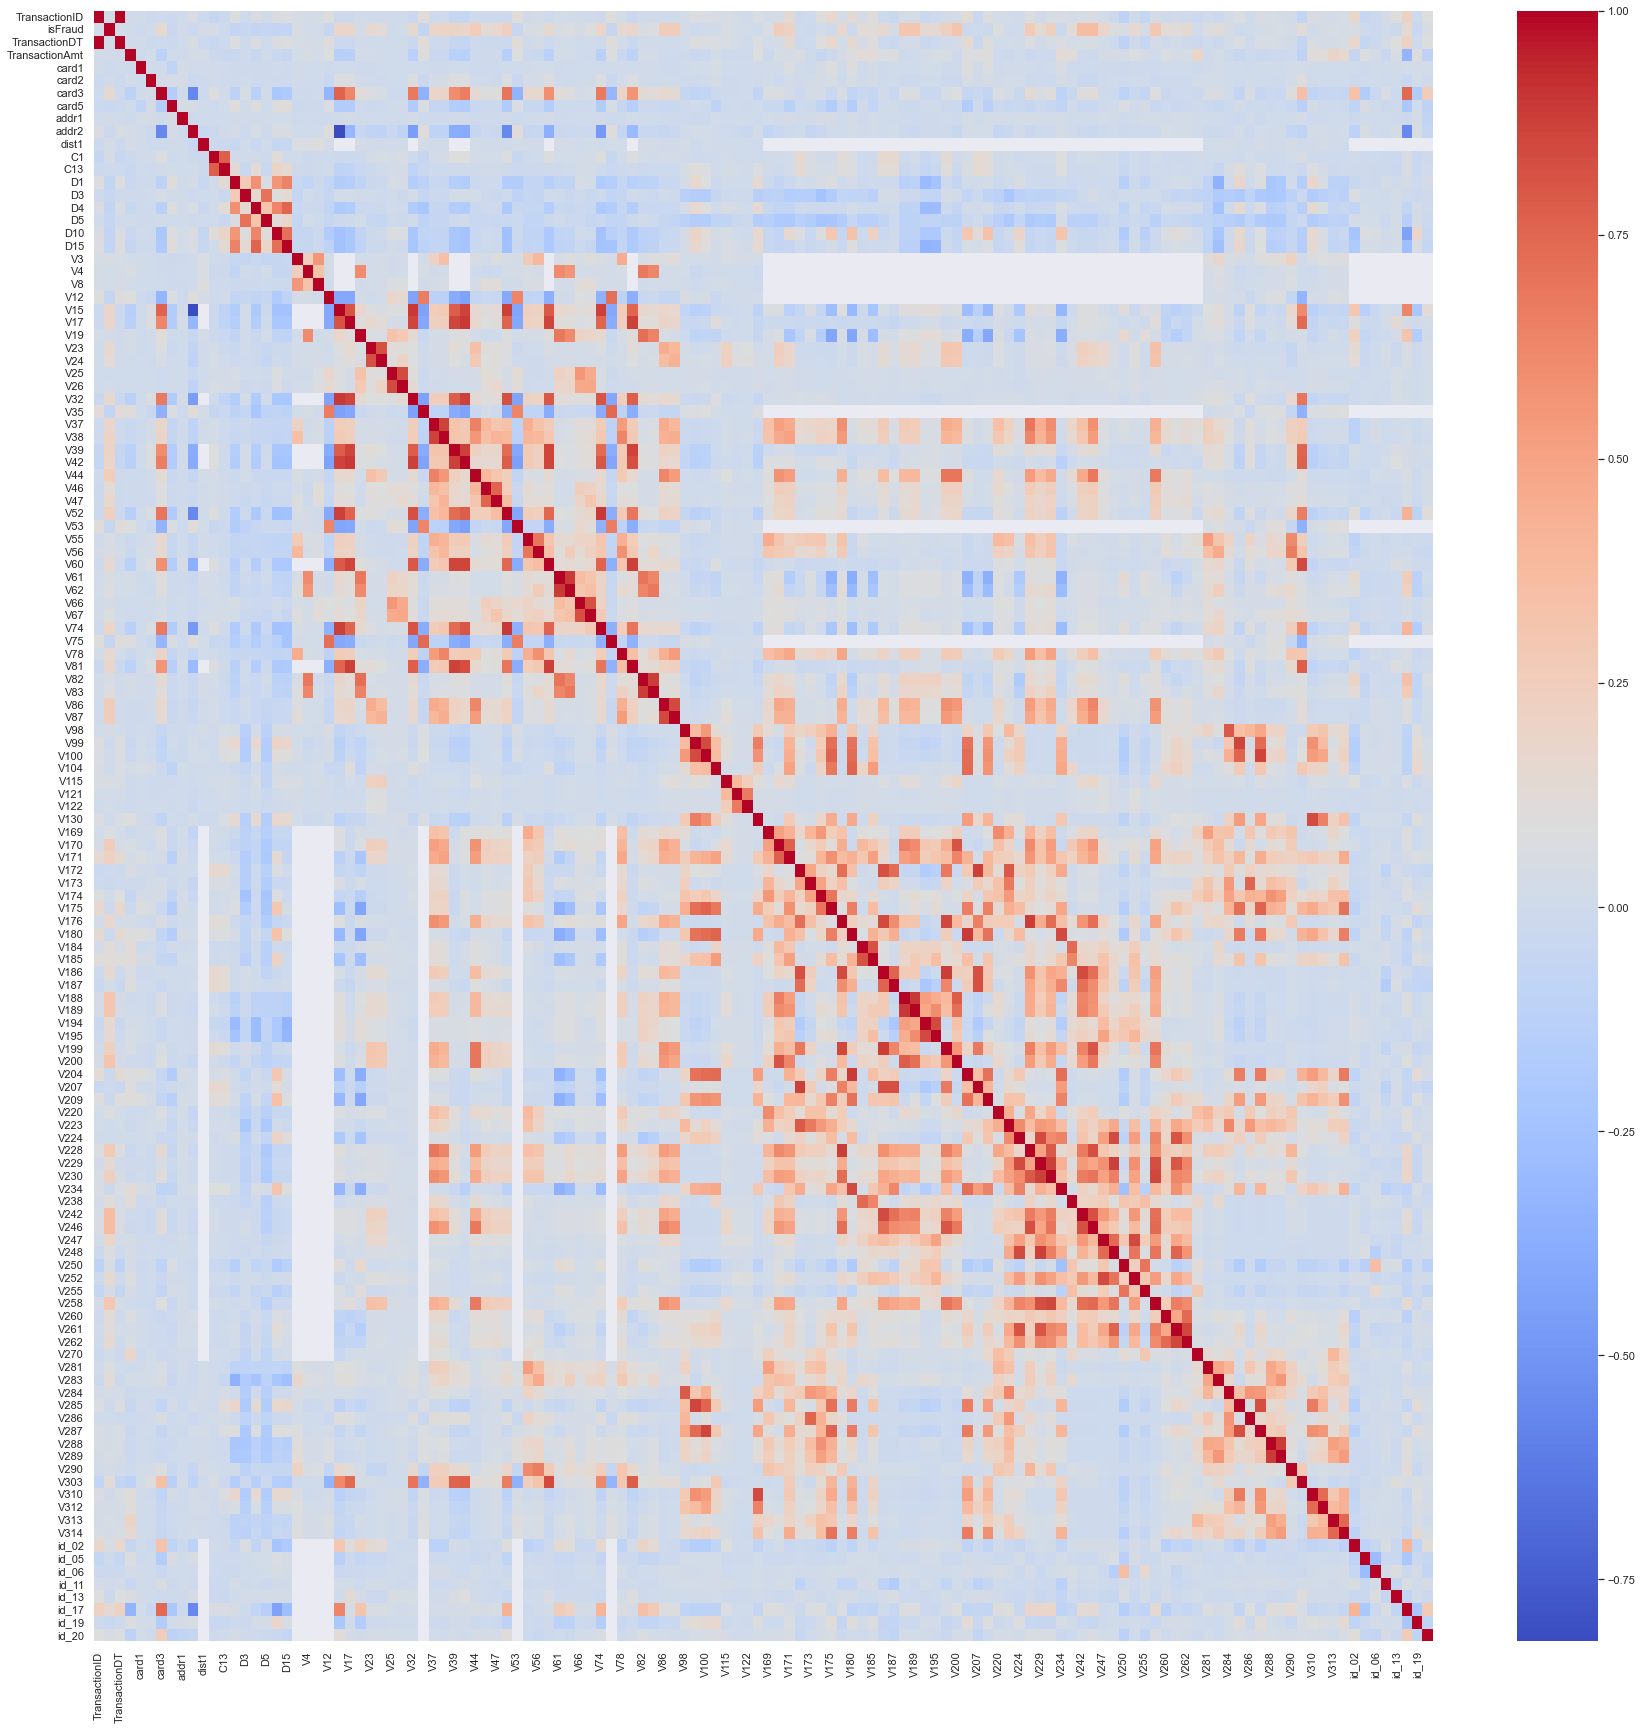

In [41]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(data.corr(), cmap='coolwarm')

### isFraud

Доля мошеннических транзакций в датасете составляет 3.5%


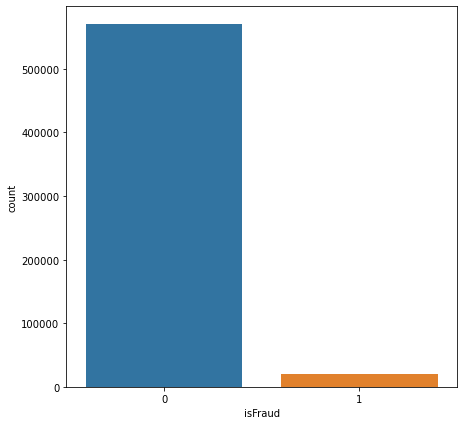

In [15]:
fraud_percent = data.query('isFraud == 1').shape[0] / data.shape[0] * 100
print(f'Доля мошеннических транзакций в датасете составляет {fraud_percent:.1f}%')
plt.figure(figsize=(7,7))
sns.countplot(data=data, x='isFraud');

### TransactionAmt

#### Гистограмма TransactionAmt

Построим гистограммы TransactionAmt отдельно для isFraud=0 и isFraud=1. Из гистограмм видно, что большая часть как мошеннических, так и немошеннических транзакций проведены на сумму меньше 1000. Также можем увидеть, что распределение транзакций в зависимости от суммы платежа одинаковое для isFraud=0 (немошеннические) и isFraud=1 (мошеннические).

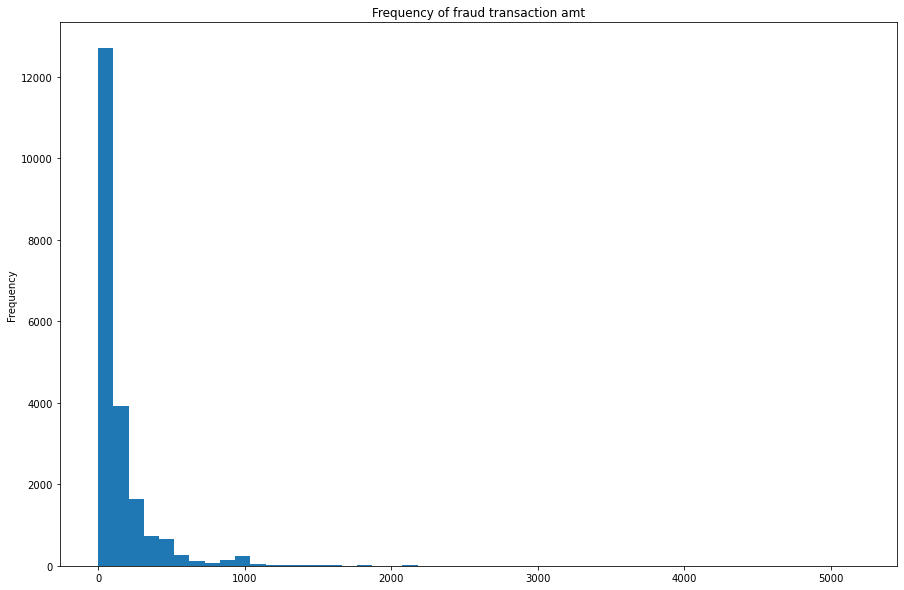

In [12]:
data.query('isFraud == 1')['TransactionAmt'].plot(title='Frequency of fraud transaction amt', kind='hist', figsize=(15,10), bins=50);


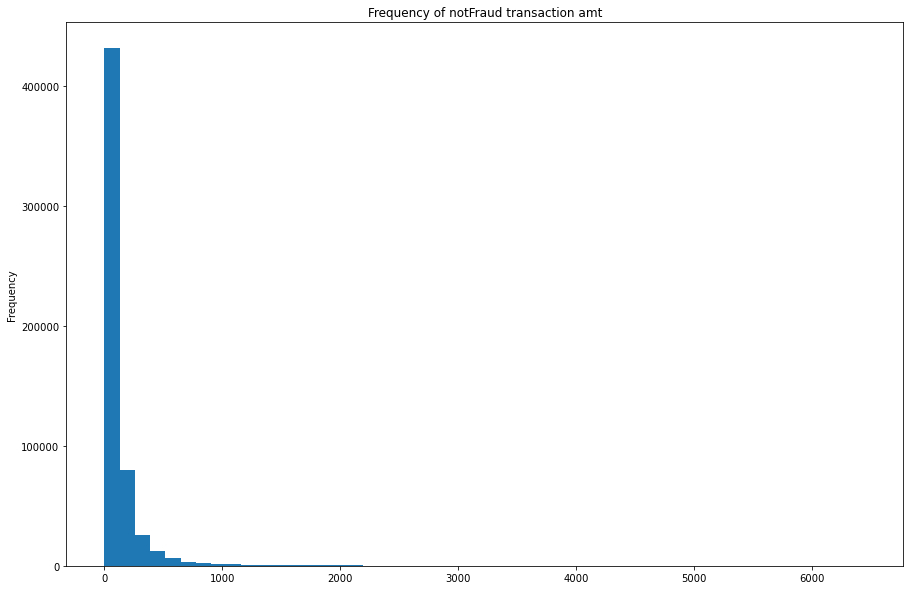

In [13]:
data.query('isFraud == 0 & TransactionAmt < 10000')['TransactionAmt'].plot(title='Frequency of notFraud transaction amt', kind='hist', figsize=(15,10), bins=50);

#### Корреляция TransactionAmt с целевой переменной

In [5]:
data_for_corr = data.copy()

In [6]:
obj_cols = ['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
            'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']

In [7]:
remove_obj_cols = []
for col in obj_cols:
    if col in data_for_corr.columns:
        remove_obj_cols.append(col)
        
data_for_corr = data_for_corr.drop(columns=remove_obj_cols)

In [8]:
def get_corr_bar_plot(df_corr, filtered_cols):
    list_corrs = []
    list_cols = []
    for col in df_corr.columns:
        if col != 'isFraud' and col in filtered_cols:
            list_cols.append(col)
            list_corrs.append(abs(df_corr.loc[col,'isFraud']))
    d_l = {'corrs' : list_corrs, 'cols' : list_cols}
    df = pd.DataFrame(d_l)
    plt.subplots(figsize=(15,10))
    sns.barplot(data=df, x="cols", y="corrs")

In [9]:
data_corr = data_for_corr.corr()

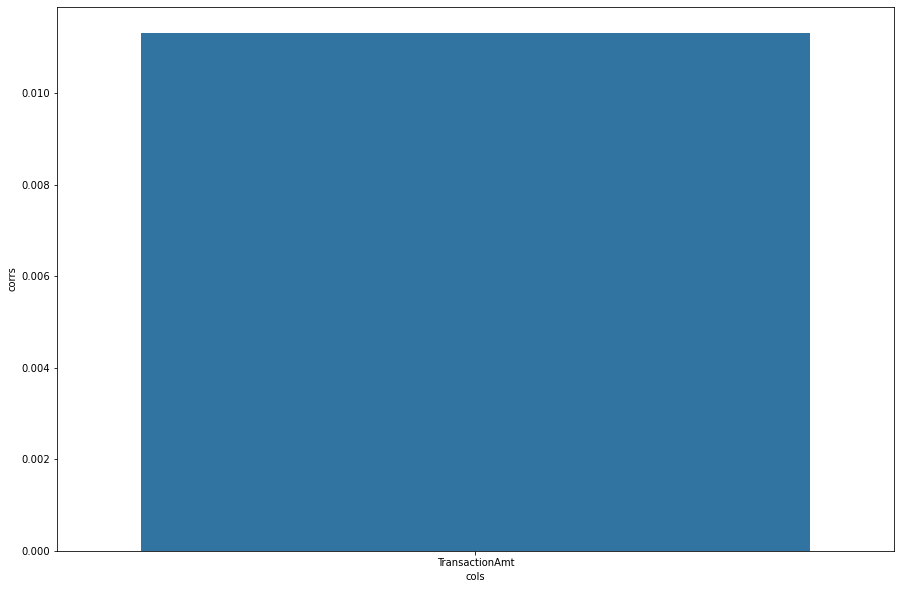

In [10]:
get_corr_bar_plot(data_corr, ['TransactionAmt'])

### ProductCD

#### Гистограмма ProductCD

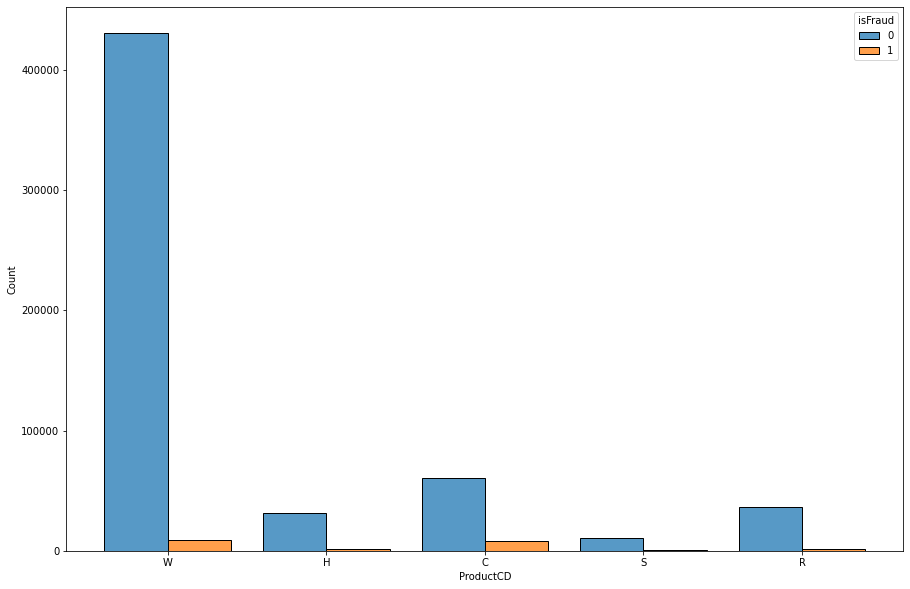

In [41]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x='ProductCD', hue="isFraud", multiple="dodge", shrink=.8);

#### Процент мошеннических транзакций для ProductCD

In [61]:
def get_fraud_percent_barplot(df, col_name, too_many_uniques_in_column):
    fraud_trs = data.query('isFraud == 1').groupby(col_name)[col_name].count()
    all_trs = data.groupby(col_name)[col_name].count()
    d = dict()
    for name in all_trs.index:
        try:
            fraud_num = fraud_trs[name]
        except:
            fraud_num = 0
        d[name] = fraud_num / all_trs[name] * 100
        
    sorted_d = dict(sorted(d.items(), reverse=True, key=lambda item: item[1]))
    x = list(sorted_d.keys())
    y = list(sorted_d.values())
    plt.subplots(figsize=(15,10))
    if too_many_uniques_in_column:
        x = x[:100]
        y = y[:100]
        plt.xticks(rotation='vertical')
    
    sns.barplot(x=x, y=y);

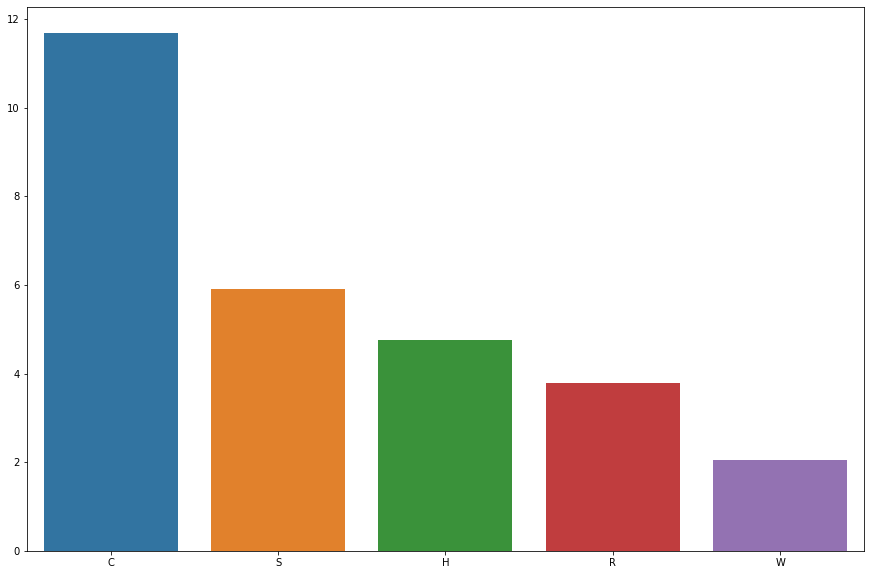

In [55]:
get_fraud_percent_barplot(data, 'ProductCD', False)

### DeviceType

#### Гистограмма DeviceType

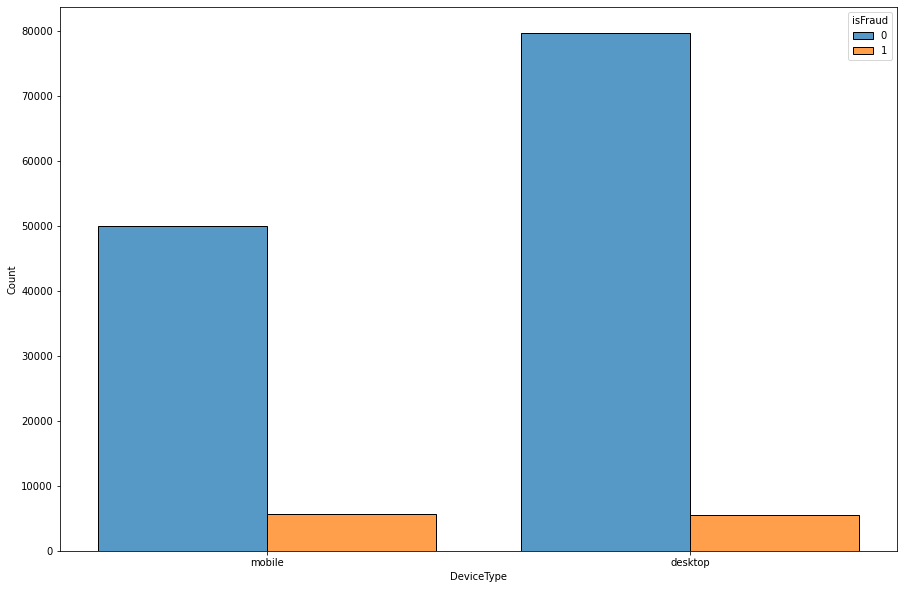

In [64]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x='DeviceType', hue="isFraud", multiple="dodge", shrink=.8);

#### Процент мошеннических транзакций для DeviceType

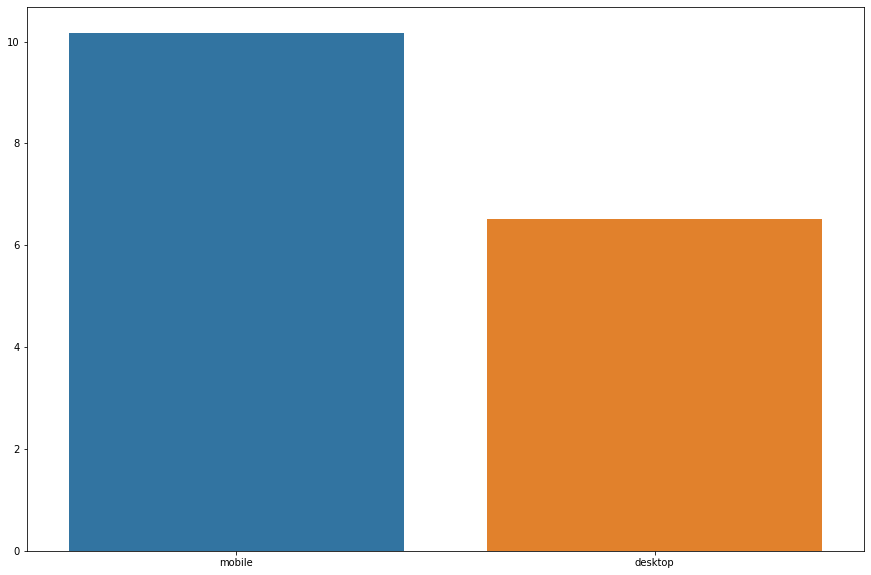

In [65]:
get_fraud_percent_barplot(data, 'DeviceType', False)

### DeviceInfo

Построим гистограмму для топ-10 устройств по количеству транзакций.

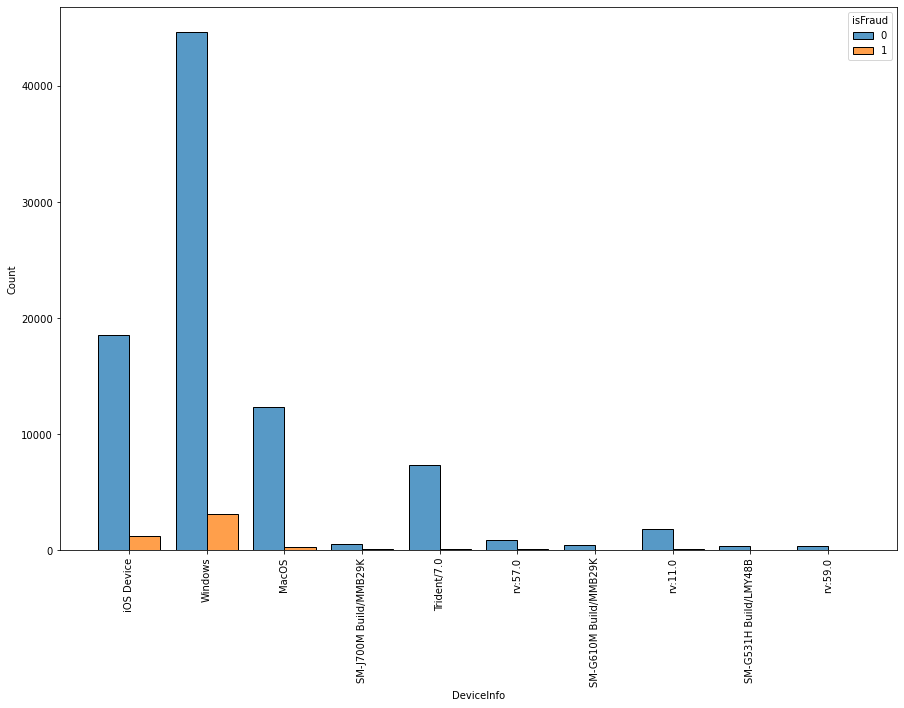

In [43]:
frequent_devices = data.groupby('DeviceInfo')['DeviceInfo'].count().sort_values(ascending=False).head(10).index
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.histplot(data=data[data['DeviceInfo'].isin(frequent_devices)], x='DeviceInfo', hue="isFraud", multiple="dodge", shrink=.8);

Построим гистограмму для устройств (DeviceInfo) с наименьшим количеством транзакций. Из гистограммы видно, что в датасете есть большое количество устройств, с которых была совершена всего одна транзакция. И около десятка устройств, с которых была совершена одна транзакция и эта транзакция - мошенническая.

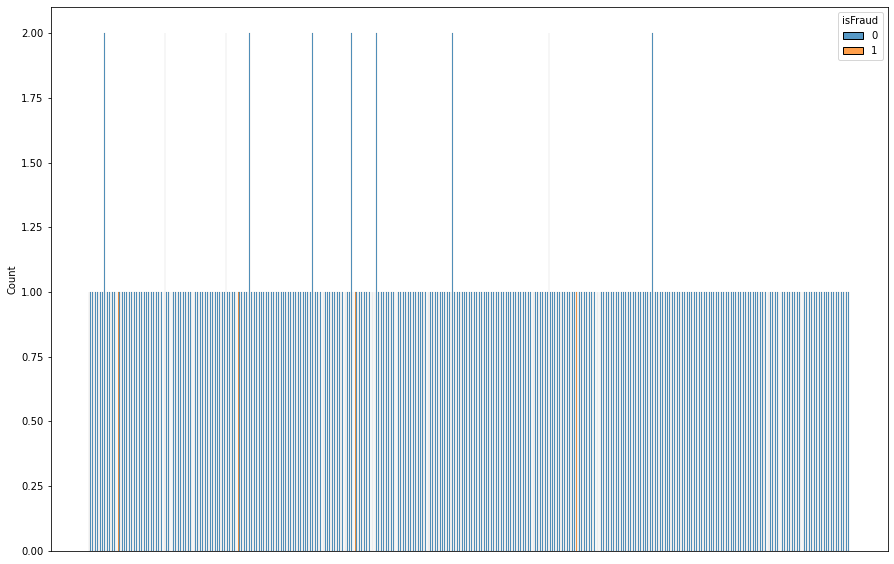

In [44]:
rare_devices = data.groupby('DeviceInfo')['DeviceInfo'].count().sort_values(ascending=True).head(450).index
plt.figure(figsize=(15,10))
plt.xticks(ticks=[])
sns.histplot(data=data[data['DeviceInfo'].isin(rare_devices)], x='DeviceInfo', hue="isFraud", multiple="dodge", shrink=.8);

#### Процент мошеннических транзакций для DeviceInfo

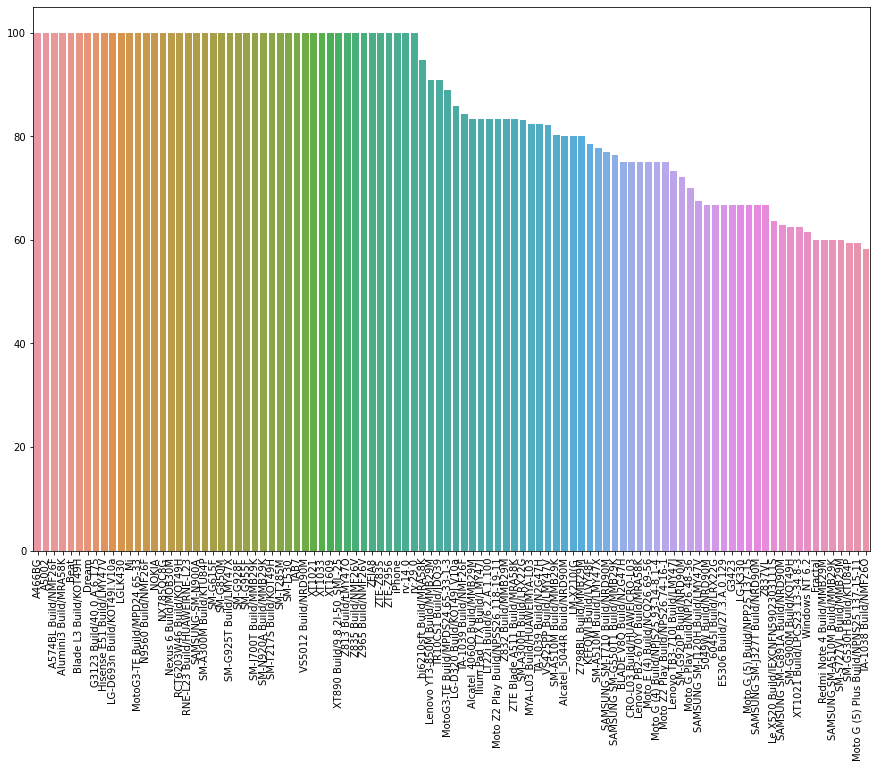

In [62]:
get_fraud_percent_barplot(data, 'DeviceInfo', True)

In [63]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C13,D1,D3,D4,D5,D10,D15,M2,M3,M4,M5,M6,M7,M8,M9,V3,V4,V8,V12,V15,V17,V19,V23,V24,V25,V26,V32,V35,V37,V38,V39,V42,V44,V46,V47,V52,V53,V55,V56,V60,V61,V62,V66,V67,V74,V75,V78,V81,V82,V83,V86,V87,V98,V99,V100,V104,V115,V121,V122,V130,V169,V170,V171,V172,V173,V174,V175,V176,V180,V184,V185,V186,V187,V188,V189,V194,V195,V199,V200,V204,V207,V209,V220,V223,V224,V228,V229,V230,V234,V238,V242,V246,V247,V248,V250,V252,V255,V258,V260,V261,V262,V270,V281,V283,V284,V285,V286,V287,V288,V289,V290,V303,V310,V312,V313,V314,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,315.0,87.0,19.0,NaN,NaN,1.0,1.0,14.0,13.0,NaN,NaN,13.0,0.0,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,325.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,330.0,87.0,287.0,outlook.com,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,315.0,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,476.0,87.0,NaN,yahoo.com,NaN,2.0,25.0,112.0,0.0,94.0,0.0,84.0,111.0,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,10.0,4.0,0.0,1.0,1.0,1.0,354.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,0.0,354.000000,135.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,420.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000,0.000000,70787.0,NaN,NaN,100.0,NotFound,NaN,N

### card1, card2, card3, card4, card5

#### Гистограммы для card1, card2, card3, card4, card5

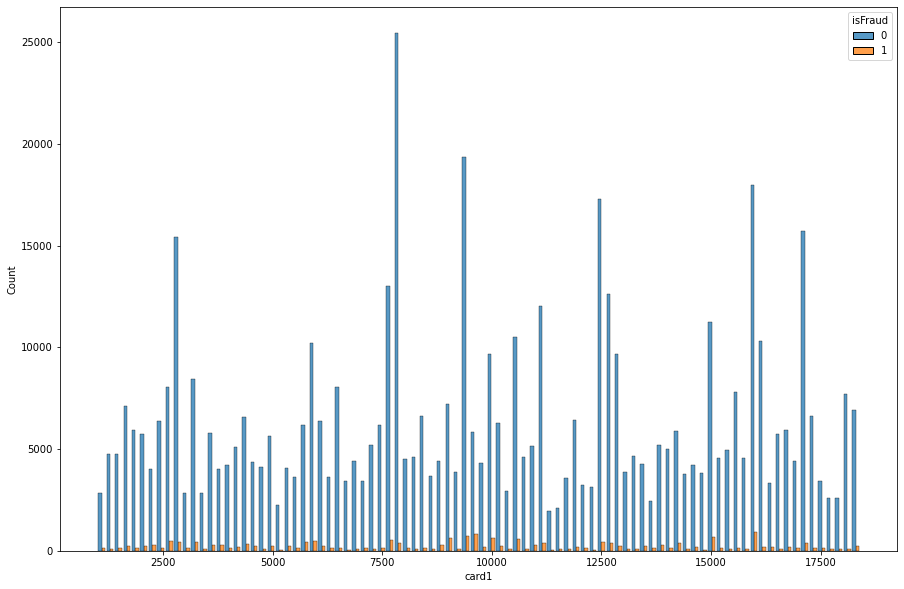

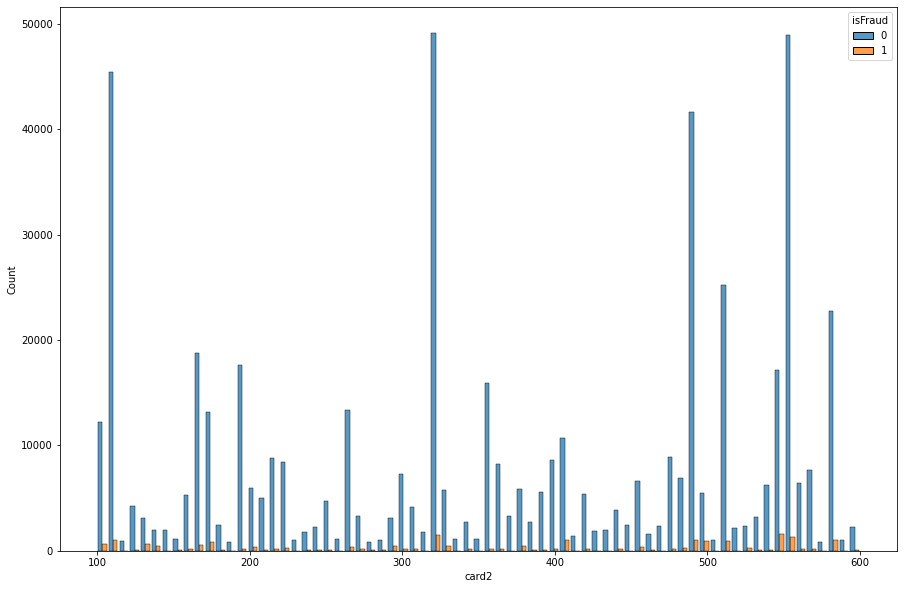

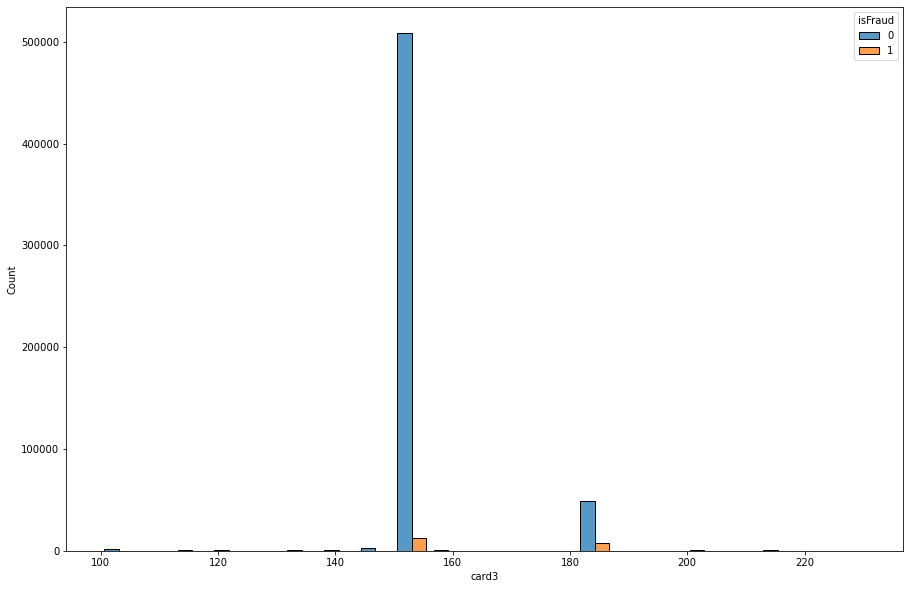

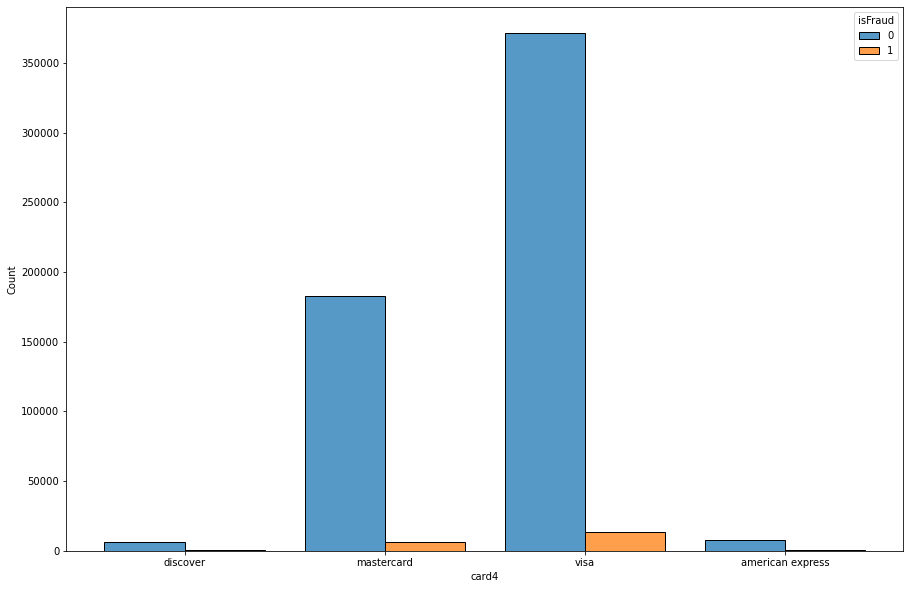

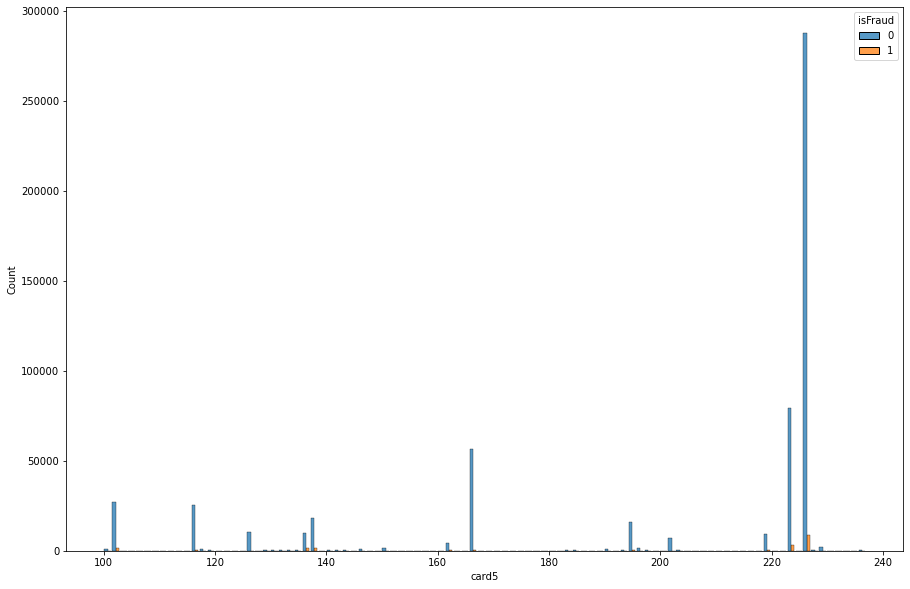

In [67]:
for col in ['card1', 'card2', 'card3', 'card4', 'card5']:
    plt.figure(figsize=(15,10))
    sns.histplot(data=data, x=col, hue="isFraud", multiple="dodge", shrink=.8)

#### Процент мошеннических транзакций

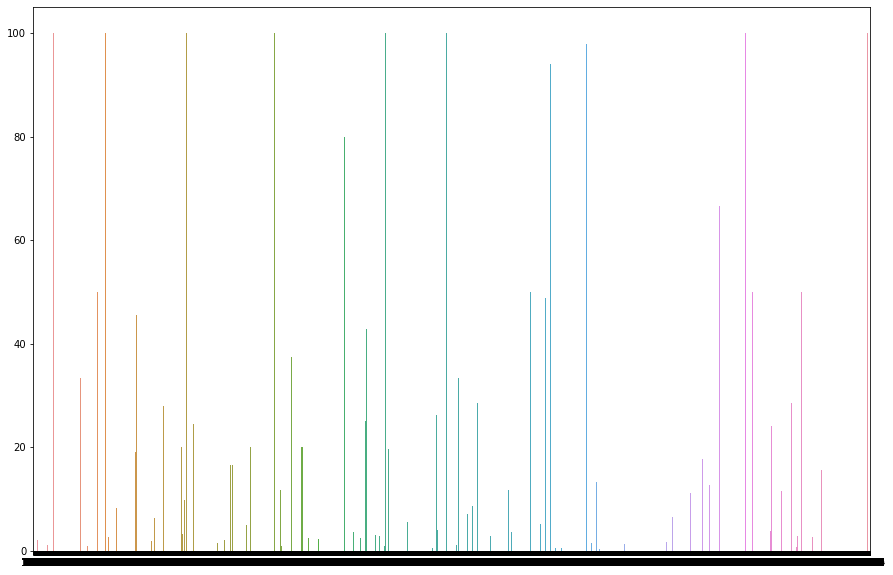

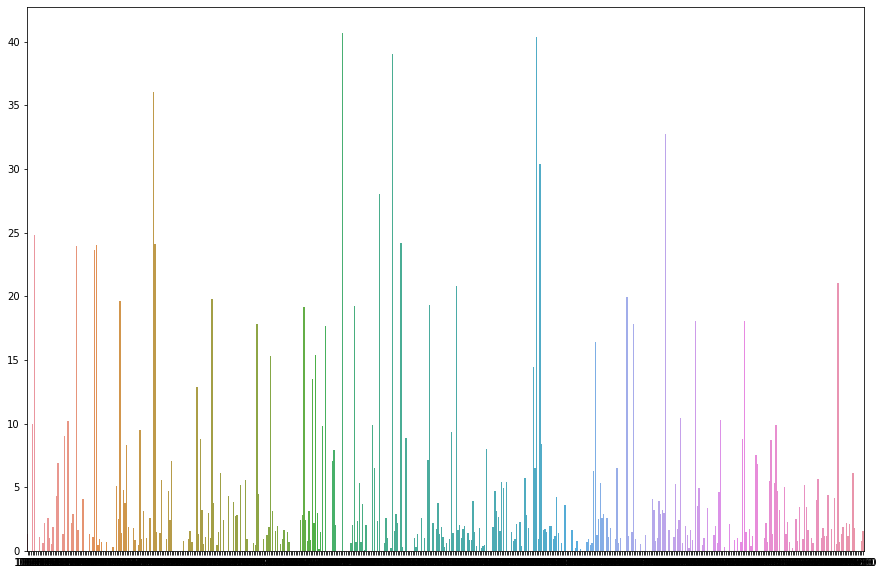

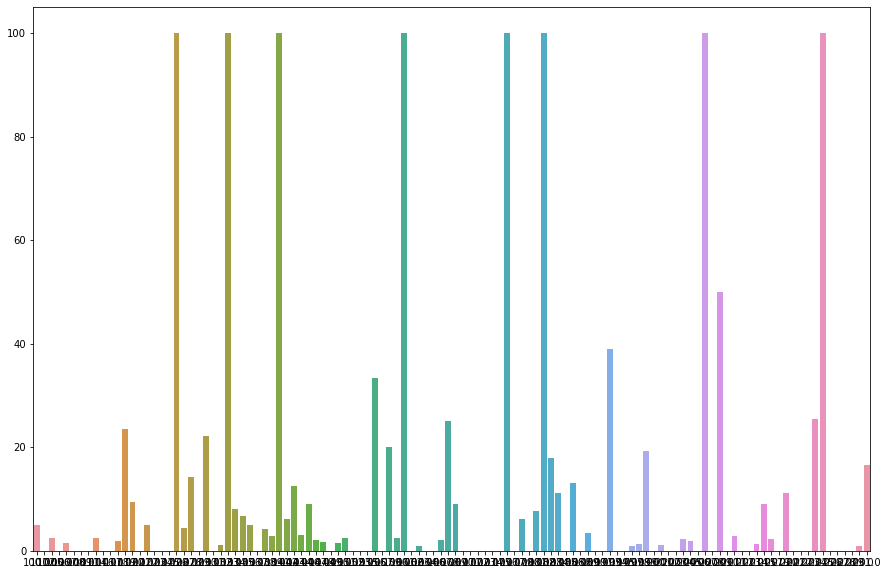

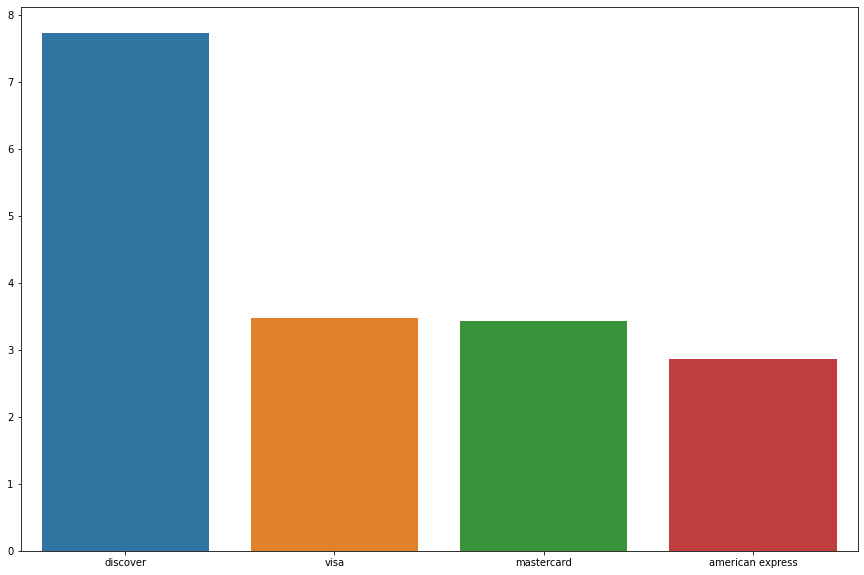

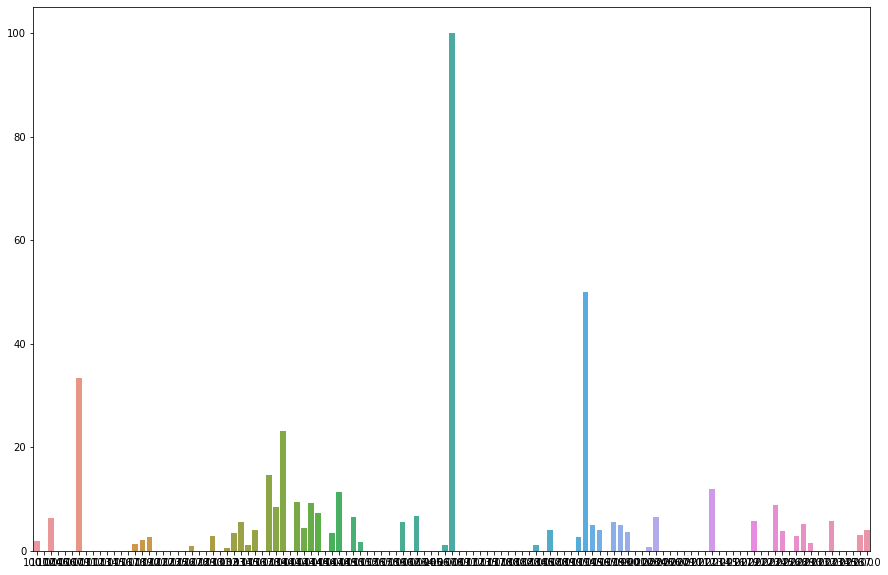

In [88]:
for col in ['card1', 'card2', 'card3', 'card4', 'card5']:
    get_fraud_percent_barplot(data, col, False)

### addr1, addr2

#### Гистограммы

#### Процент мошеннических транзакций

### dist1

#### Гистограмма

#### Корреляция dist1 с целевой переменной

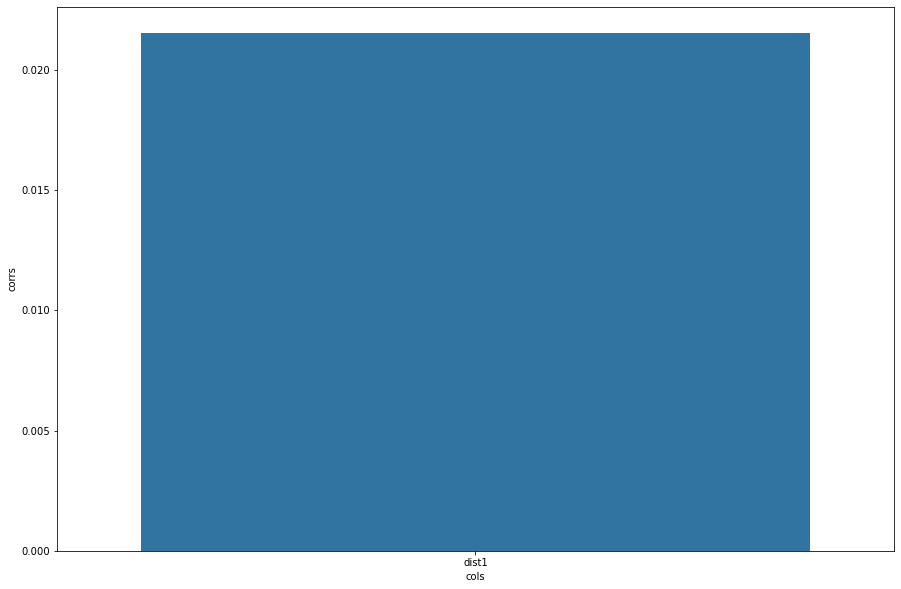

In [11]:
get_corr_bar_plot(data_corr, ['dist1'])

### P_emaildomain, R_emaildomain

#### Гистограммы

#### Процент мошеннических транзакций

### C1, C13 

#### Гистограммы

#### Корреляция C1, C13 с целевой переменной

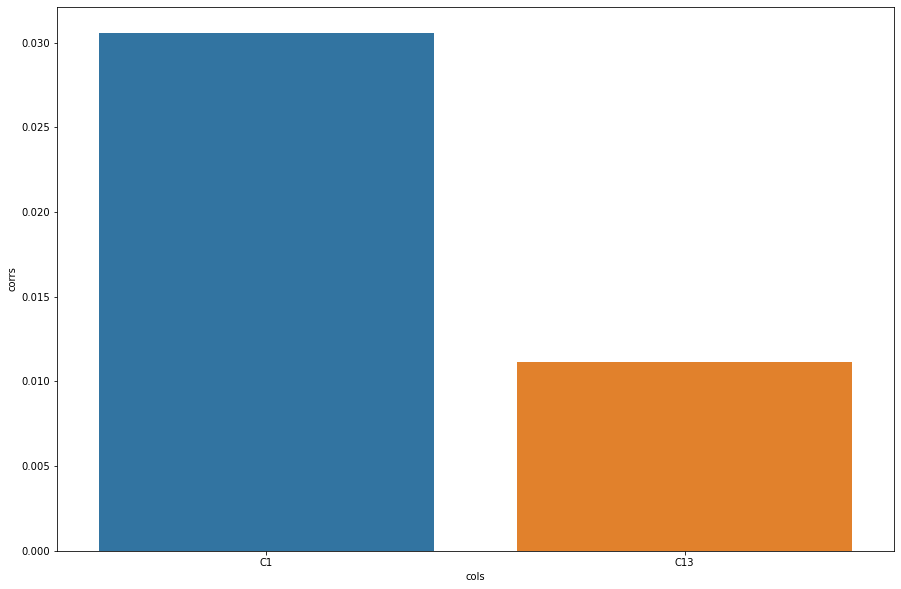

In [167]:
get_corr_bar_plot(data_corr, ['C1', 'C13'])

### D1 - D15

#### Гистограммы

#### Корреляция D1 - D15 с целевой переменной

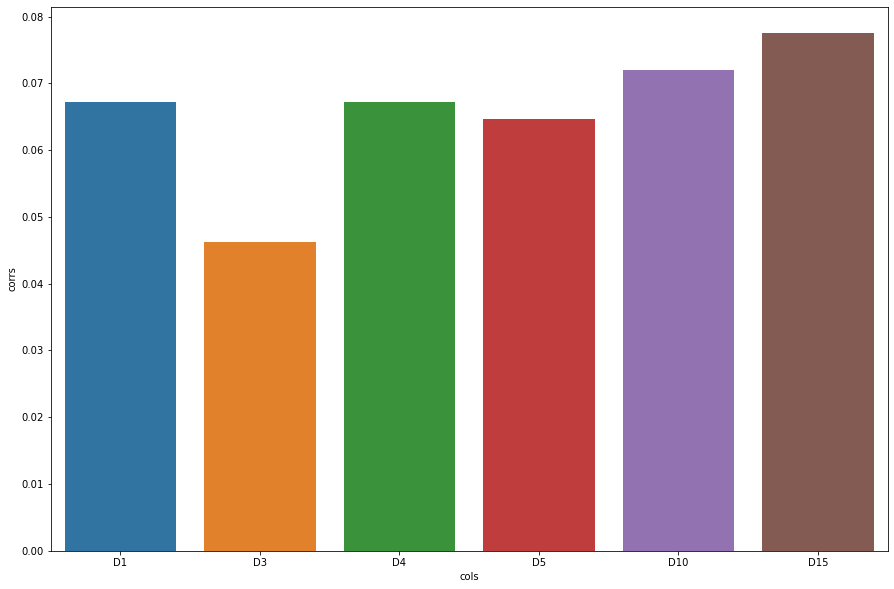

In [168]:
get_corr_bar_plot(data_corr, ['D1', 'D3', 'D4', 'D5', 'D10', 'D15'])

### M2, M3, M4, M5, M6, M7, M8, M9

#### Гистограммы

#### Процент мошеннических транзакций

### V3 - V314

#### Гистограммы

#### Корреляция D1 - D15 с целевой переменной

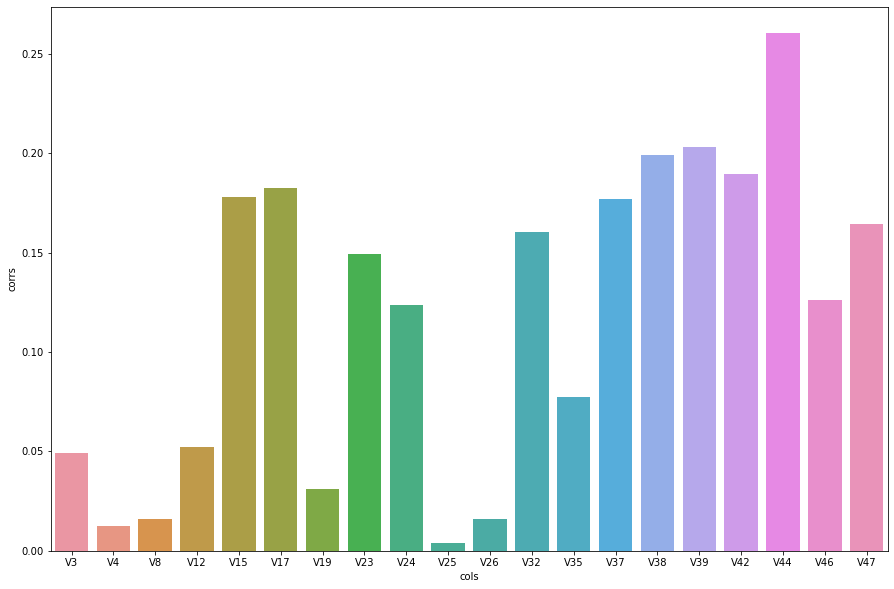

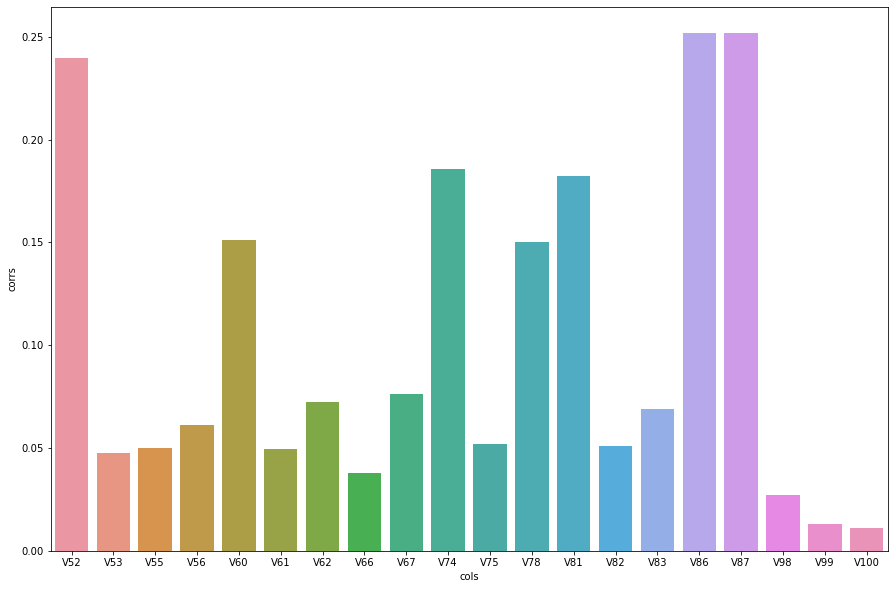

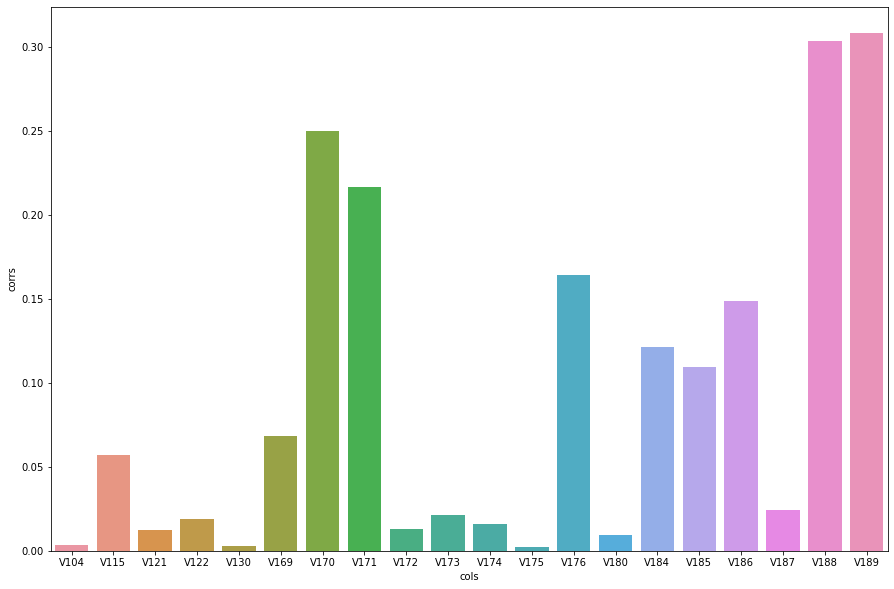

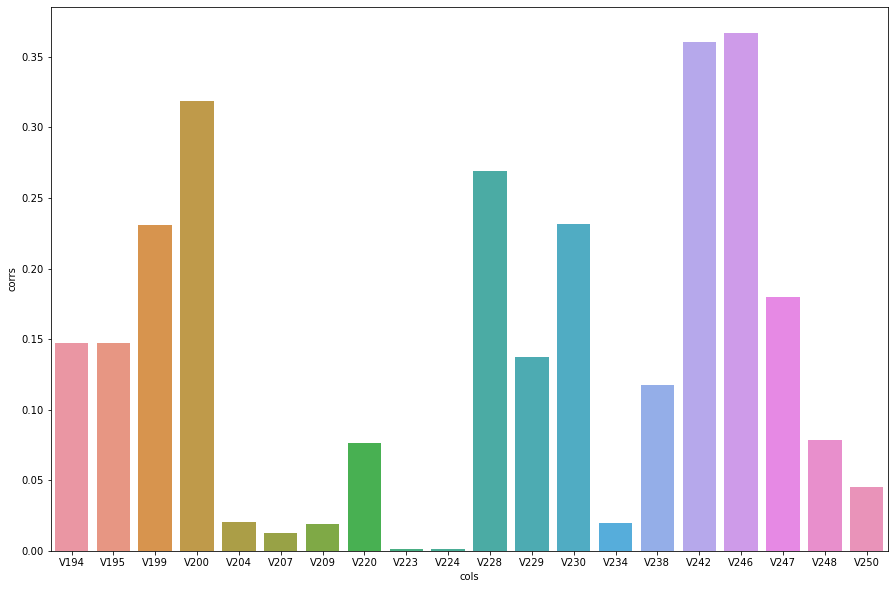

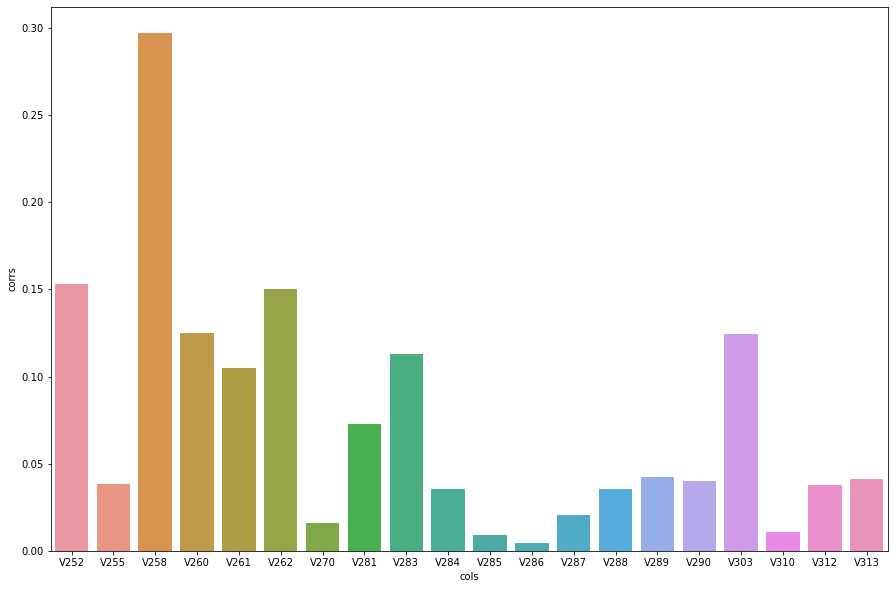

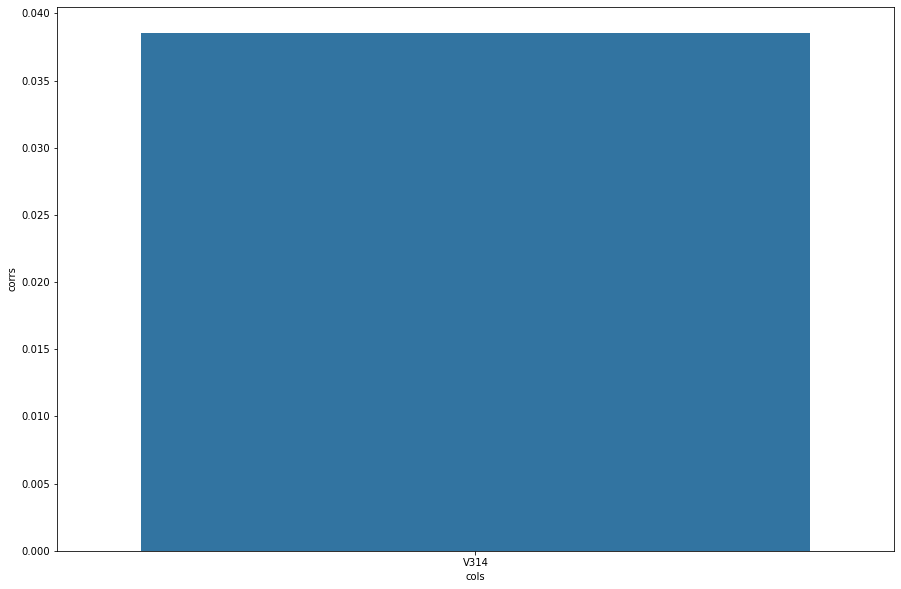

In [164]:
v_corrs = []
for col in data_corr.columns:
    if 'V' in col:
        v_corrs.append(col)

step = len(v_corrs) // 5
start = 0
end = step
while start < len(v_corrs):
    get_corr_bar_plot(data_corr, v_corrs[start:end])
    start += step
    end += step

### id_02, id_05, id_06, id_11

#### Гистограммы

#### Корреляция id_02, id_05, id_06, id_11 с целевой переменной

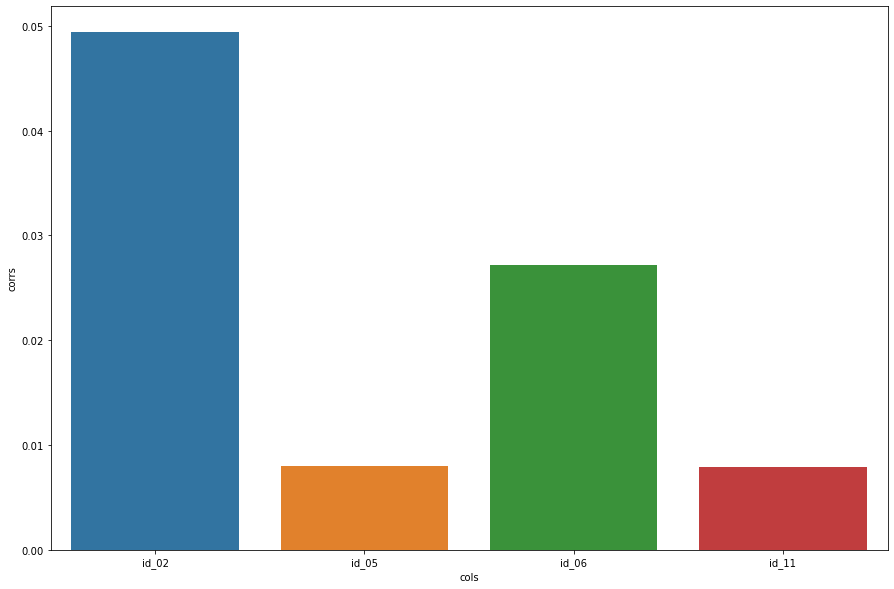

In [165]:
get_corr_bar_plot(data_corr, ['id_02', 'id_05', 'id_06', 'id_11'])

### id_12 - id_38

#### Гистограммы

#### Процент мошеннических транзакций